In [10]:
from sqlalchemy import create_engine, inspect, text
import pandas as pd

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin 

In [11]:
import os
print(os.path.exists("../dataset/olist.sqlite"))            # make sure file exists
print(os.path.abspath("../dataset/olist.sqlite"))          # absolute path shown

True
c:\Users\randy\Development\Data Science Projects\Olist Ecommerce SQLite\dataset\olist.sqlite


In [12]:
engine = create_engine("sqlite:///../dataset/olist.sqlite", echo=True)

In [13]:
inspector = inspect(engine)
table_names = inspector.get_table_names()
print(table_names)  

2025-08-27 22:47:27,058 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,059 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-08-27 22:47:27,060 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-08-27 22:47:27,063 INFO sqlalchemy.engine.Engine ROLLBACK
['customers', 'geolocation', 'leads_closed', 'leads_qualified', 'order_items', 'order_payments', 'order_reviews', 'orders', 'product_category_name_translation', 'products', 'sellers']


In [ ]:
    with engine.connect() as connection:
    result = connection.execute(text("SELECT * FROM customers LIMIT 5;"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

df.head()  # Display the first few rows of the DataFrame

2025-08-27 22:47:27,089 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,090 INFO sqlalchemy.engine.Engine SELECT * FROM customers LIMIT 5;
2025-08-27 22:47:27,091 INFO sqlalchemy.engine.Engine [generated in 0.00178s] ()
2025-08-27 22:47:27,094 INFO sqlalchemy.engine.Engine ROLLBACK


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
df = pd.read_sql_query("SELECT * FROM customers LIMIT 5;", con=engine)
df.head()

2025-08-27 22:47:27,118 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,120 INFO sqlalchemy.engine.Engine SELECT * FROM customers LIMIT 5;
2025-08-27 22:47:27,121 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-08-27 22:47:27,123 INFO sqlalchemy.engine.Engine ROLLBACK


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Data Integrity Checks

## orders 

In [16]:
query = """
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
        SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS null_order_status,
        SUM(CASE WHEN order_purchase_timestamp IS NULL THEN 1 ELSE 0 END) AS null_order_purchase_timestamp,
        SUM(CASE WHEN order_approved_at IS NULL THEN 1 ELSE 0 END) AS null_order_approved_at,
        SUM(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_carrier_date,
        SUM(CASE WHEN order_delivered_customer_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_customer_date,
        SUM(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 ELSE 0 END) AS null_order_estimated_delivery_date,
        COUNT(*) AS total_rows
    FROM orders;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)

2025-08-27 22:47:27,153 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,154 INFO sqlalchemy.engine.Engine 
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
        SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS null_order_status,
        SUM(CASE WHEN order_purchase_timestamp IS NULL THEN 1 ELSE 0 END) AS null_order_purchase_timestamp,
        SUM(CASE WHEN order_approved_at IS NULL THEN 1 ELSE 0 END) AS null_order_approved_at,
        SUM(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_carrier_date,
        SUM(CASE WHEN order_delivered_customer_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_customer_date,
        SUM(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 ELSE 0 END) AS null_order_estimated_delivery_date,
        COUNT(*) AS total_rows
    FROM orders;

2025-08-27

In [17]:
# Check table constrainst 

with engine.connect() as connection:
    result = connection.execute(text("PRAGMA table_info('orders');"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the table info for 'orders'

2025-08-27 22:47:27,279 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,281 INFO sqlalchemy.engine.Engine PRAGMA table_info('orders');
2025-08-27 22:47:27,282 INFO sqlalchemy.engine.Engine [generated in 0.00291s] ()
2025-08-27 22:47:27,285 INFO sqlalchemy.engine.Engine ROLLBACK
   cid                           name  type  notnull dflt_value  pk
0    0                       order_id  TEXT        0       None   0
1    1                    customer_id  TEXT        0       None   0
2    2                   order_status  TEXT        0       None   0
3    3       order_purchase_timestamp  TEXT        0       None   0
4    4              order_approved_at  TEXT        0       None   0
5    5   order_delivered_carrier_date  TEXT        0       None   0
6    6  order_delivered_customer_date  TEXT        0       None   0
7    7  order_estimated_delivery_date  TEXT        0       None   0


In [18]:
# Check duplicates in order_id and customer_id

query = """
    SELECT 
        COUNT(DISTINCT order_id) AS unique_order_ids,
        COUNT(order_id) AS total_order_ids
    FROM orders;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())    

print(df)  # Display the counts of order_id and customer_id

2025-08-27 22:47:27,307 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,309 INFO sqlalchemy.engine.Engine 
    SELECT 
        COUNT(DISTINCT order_id) AS unique_order_ids,
        COUNT(order_id) AS total_order_ids
    FROM orders;

2025-08-27 22:47:27,309 INFO sqlalchemy.engine.Engine [generated in 0.00229s] ()
2025-08-27 22:47:27,739 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_ids  total_order_ids
0             99441            99441


## customers 

In [19]:
query = """
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_id,
        SUM(CASE WHEN customer_unique_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN customer_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_customer_zip_code_prefix,
        SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) AS null_customer_city,
        SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) AS null_customer_state,
        COUNT(*) AS total_rows  
    FROM customers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the null counts for customers table

2025-08-27 22:47:27,754 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,755 INFO sqlalchemy.engine.Engine 
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_id,
        SUM(CASE WHEN customer_unique_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN customer_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_customer_zip_code_prefix,
        SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) AS null_customer_city,
        SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) AS null_customer_state,
        COUNT(*) AS total_rows  
    FROM customers;

2025-08-27 22:47:27,756 INFO sqlalchemy.engine.Engine [generated in 0.00209s] ()
2025-08-27 22:47:27,813 INFO sqlalchemy.engine.Engine ROLLBACK
   null_customer_id  null_customer_unique_id  null_customer_zip_code_prefix  \
0                 0                        0                              0   

   null_customer_city  null_customer_state  t

In [20]:
with engine.connect() as connection:
    result = connection.execute(text("PRAGMA table_info('customers');"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the table info for 'customers'

2025-08-27 22:47:27,832 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,833 INFO sqlalchemy.engine.Engine PRAGMA table_info('customers');
2025-08-27 22:47:27,834 INFO sqlalchemy.engine.Engine [generated in 0.00185s] ()
2025-08-27 22:47:27,837 INFO sqlalchemy.engine.Engine ROLLBACK
   cid                      name     type  notnull dflt_value  pk
0    0               customer_id     TEXT        0       None   0
1    1        customer_unique_id     TEXT        0       None   0
2    2  customer_zip_code_prefix  INTEGER        0       None   0
3    3             customer_city     TEXT        0       None   0
4    4            customer_state     TEXT        0       None   0


In [21]:
query = """
    SELECT 
        COUNT(customer_id) AS total_customer_ids,
        COUNT(DISTINCT customer_id) AS unique_customer_ids
    FROM customers;
"""
with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique customers in orders

2025-08-27 22:47:27,864 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:27,865 INFO sqlalchemy.engine.Engine 
    SELECT 
        COUNT(customer_id) AS total_customer_ids,
        COUNT(DISTINCT customer_id) AS unique_customer_ids
    FROM customers;

2025-08-27 22:47:27,866 INFO sqlalchemy.engine.Engine [generated in 0.00185s] ()
2025-08-27 22:47:28,415 INFO sqlalchemy.engine.Engine ROLLBACK
   total_customer_ids  unique_customer_ids
0               99441                99441


## order_payments

In [23]:
query = """
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN payment_sequential IS NULL THEN 1 ELSE 0 END) AS null_payment_sequential,
    SUM(CASE WHEN payment_type IS NULL THEN 1 ELSE 0 END) AS null_payment_type,
    SUM(CASE WHEN payment_installments IS NULL THEN 1 ELSE 0 END) AS null_payment_installments,
    SUM(CASE WHEN payment_value IS NULL THEN 1 ELSE 0 END) AS null_payment_value,
    COUNT(*) AS total_rows
FROM order_payments;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_payments table

2025-08-27 22:47:35,579 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:35,580 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN payment_sequential IS NULL THEN 1 ELSE 0 END) AS null_payment_sequential,
    SUM(CASE WHEN payment_type IS NULL THEN 1 ELSE 0 END) AS null_payment_type,
    SUM(CASE WHEN payment_installments IS NULL THEN 1 ELSE 0 END) AS null_payment_installments,
    SUM(CASE WHEN payment_value IS NULL THEN 1 ELSE 0 END) AS null_payment_value,
    COUNT(*) AS total_rows
FROM order_payments;

2025-08-27 22:47:35,581 INFO sqlalchemy.engine.Engine [generated in 0.00214s] ()
2025-08-27 22:47:35,626 INFO sqlalchemy.engine.Engine ROLLBACK
   null_order_id  null_payment_sequential  null_payment_type  \
0              0                        0                  0   

   null_payment_installments  null_payment_value  total_rows  
0                          0                   0      10388

## products 

In [24]:
query = """
SELECT 
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_name_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_name_lenght,
    SUM(CASE WHEN product_description_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_description_lenght,
    SUM(CASE WHEN product_photos_qty IS NULL THEN 1 ELSE 0 END) AS null_product_photos_qty,
    SUM(CASE WHEN product_weight_g IS NULL THEN 1 ELSE 0 END) AS null_product_weight_g,
    SUM(CASE WHEN product_length_cm IS NULL THEN 1 ELSE 0 END) AS null_product_length_cm,
    SUM(CASE WHEN product_height_cm IS NULL THEN 1 ELSE 0 END) AS null_product_height_cm,
    SUM(CASE WHEN product_width_cm IS NULL THEN 1 ELSE 0 END) AS null_product_width_cm,
    COUNT(*) AS total_rows
FROM products;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for products table

2025-08-27 22:47:35,655 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:35,656 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_name_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_name_lenght,
    SUM(CASE WHEN product_description_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_description_lenght,
    SUM(CASE WHEN product_photos_qty IS NULL THEN 1 ELSE 0 END) AS null_product_photos_qty,
    SUM(CASE WHEN product_weight_g IS NULL THEN 1 ELSE 0 END) AS null_product_weight_g,
    SUM(CASE WHEN product_length_cm IS NULL THEN 1 ELSE 0 END) AS null_product_length_cm,
    SUM(CASE WHEN product_height_cm IS NULL THEN 1 ELSE 0 END) AS null_product_height_cm,
    SUM(CASE WHEN product_width_cm IS NULL THEN 1 ELSE 0 END) AS null_product_width_cm,
    COUNT(*) AS total_rows
FROM products;


In [25]:
query = """
SELECT 
    COUNT(DISTINCT product_id) AS unique_product_ids,
    COUNT(product_id) AS total_product_ids
FROM products;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the count of unique products in products table

2025-08-27 22:47:35,702 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:35,703 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT product_id) AS unique_product_ids,
    COUNT(product_id) AS total_product_ids
FROM products;

2025-08-27 22:47:35,704 INFO sqlalchemy.engine.Engine [generated in 0.00236s] ()
2025-08-27 22:47:35,754 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_product_ids  total_product_ids
0               32951              32951


## order_items

In [26]:
query = """
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN order_item_id IS NULL THEN 1 ELSE 0 END) AS null_order_item_id,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN shipping_limit_date IS NULL THEN 1 ELSE 0 END) AS null_shipping_limit_date,
    SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) AS null_price,
    SUM(CASE WHEN freight_value IS NULL THEN 1 ELSE 0 END) AS null_freight_value,
    COUNT(*) AS total_rows
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_items table

2025-08-27 22:47:35,779 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:35,780 INFO sqlalchemy.engine.Engine 
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN order_item_id IS NULL THEN 1 ELSE 0 END) AS null_order_item_id,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN shipping_limit_date IS NULL THEN 1 ELSE 0 END) AS null_shipping_limit_date,
    SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) AS null_price,
    SUM(CASE WHEN freight_value IS NULL THEN 1 ELSE 0 END) AS null_freight_value,
    COUNT(*) AS total_rows
FROM order_items;

2025-08-27 22:47:35,782 INFO sqlalchemy.engine.Engine [generated in 0.00249s] ()
2025-08-27 22:47:35,886 INFO sqlalchemy.engine.Engine ROLLBACK
   null_order_id  null_order_item_id  null_product_id  null_seller_id  \
0              0                   0                0     

In [44]:
query = """
SELECT 
    COUNT(DISTINCT order_id) AS unique_order_ids,
    COUNT(order_id) AS total_order_ids,
    COUNT(DISTINCT order_item_id) AS unique_order_item_ids,
    COUNT(order_item_id) AS total_order_ids
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the count of unique orders in order_items table

2025-08-27 22:53:19,927 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:53:19,928 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT order_id) AS unique_order_ids,
    COUNT(order_id) AS total_order_ids,
    COUNT(DISTINCT order_item_id) AS unique_order_item_ids,
    COUNT(order_item_id) AS total_order_ids
FROM order_items;

2025-08-27 22:53:19,929 INFO sqlalchemy.engine.Engine [generated in 0.00190s] ()
2025-08-27 22:53:20,022 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_ids  total_order_ids  unique_order_item_ids  total_order_ids
0             98666           112650                     21           112650


In [45]:
query = """
SELECT 
    COUNT(DISTINCT CONCAT(order_id, order_item_id)) AS unique_order_item_combinations,
    COUNT(*) AS total_rows
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique order-item combinations in order_items table

2025-08-27 22:53:42,540 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:53:42,541 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT CONCAT(order_id, order_item_id)) AS unique_order_item_combinations,
    COUNT(*) AS total_rows
FROM order_items;

2025-08-27 22:53:42,542 INFO sqlalchemy.engine.Engine [generated in 0.00176s] ()
2025-08-27 22:53:42,670 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_item_combinations  total_rows
0                          112650      112650


## order_reviews

In [28]:
query = """
SELECT 
    SUM(CASE WHEN review_id IS NULL THEN 1 ELSE 0 END) AS null_review_id,
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN review_score IS NULL THEN 1 ELSE 0 END) AS null_review_score,
    SUM(CASE WHEN review_comment_title IS NULL THEN 1 ELSE 0 END) AS null_review_comment_title,
    SUM(CASE WHEN review_comment_message IS NULL THEN 1 ELSE 0 END) AS null_review_comment_message,
    SUM(CASE WHEN review_creation_date IS NULL THEN 1 ELSE 0 END) AS null_review_creation_date,
    SUM(CASE WHEN review_answer_timestamp IS NULL THEN 1 ELSE 0 END) AS null_review_answer_timestamp,
    COUNT(*) AS total_rows
FROM order_reviews;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_reviews table

2025-08-27 22:47:36,060 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,062 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN review_id IS NULL THEN 1 ELSE 0 END) AS null_review_id,
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN review_score IS NULL THEN 1 ELSE 0 END) AS null_review_score,
    SUM(CASE WHEN review_comment_title IS NULL THEN 1 ELSE 0 END) AS null_review_comment_title,
    SUM(CASE WHEN review_comment_message IS NULL THEN 1 ELSE 0 END) AS null_review_comment_message,
    SUM(CASE WHEN review_creation_date IS NULL THEN 1 ELSE 0 END) AS null_review_creation_date,
    SUM(CASE WHEN review_answer_timestamp IS NULL THEN 1 ELSE 0 END) AS null_review_answer_timestamp,
    COUNT(*) AS total_rows
FROM order_reviews;

2025-08-27 22:47:36,062 INFO sqlalchemy.engine.Engine [generated in 0.00234s] ()
2025-08-27 22:47:36,132 INFO sqlalchemy.engine.Engine ROLLBACK
   null_review_id  null_order_id  null_review_score  \

In [29]:
query = """
SELECT
    COUNT(DISTINCT review_id) AS unique_review_ids,
    COUNT(review_id) AS total_review_ids
FROM order_reviews;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique reviews in order_reviews table


2025-08-27 22:47:36,149 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,150 INFO sqlalchemy.engine.Engine 
SELECT
    COUNT(DISTINCT review_id) AS unique_review_ids,
    COUNT(review_id) AS total_review_ids
FROM order_reviews;

2025-08-27 22:47:36,151 INFO sqlalchemy.engine.Engine [generated in 0.00152s] ()
2025-08-27 22:47:36,587 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_review_ids  total_review_ids
0              98410             99224


## product_category_name_tranlation

In [30]:
query = """
SELECT 
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_category_name_english IS NULL THEN 1 ELSE 0 END) AS null_product_category_name_english,
    COUNT(*) AS total_rows
FROM product_category_name_translation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for product_category_name_translation table

2025-08-27 22:47:36,616 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,617 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_category_name_english IS NULL THEN 1 ELSE 0 END) AS null_product_category_name_english,
    COUNT(*) AS total_rows
FROM product_category_name_translation;

2025-08-27 22:47:36,618 INFO sqlalchemy.engine.Engine [generated in 0.00212s] ()
2025-08-27 22:47:36,621 INFO sqlalchemy.engine.Engine ROLLBACK
   null_product_category_name  null_product_category_name_english  total_rows
0                           0                                   0          71


In [31]:
query = """
SELECT 
    COUNT(DISTINCT product_category_name) AS unique_product_category_names,
    COUNT(product_category_name) AS total_product_category_names
FROM product_category_name_translation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique product category names in product_category_name_translation table

2025-08-27 22:47:36,646 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,647 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT product_category_name) AS unique_product_category_names,
    COUNT(product_category_name) AS total_product_category_names
FROM product_category_name_translation;

2025-08-27 22:47:36,648 INFO sqlalchemy.engine.Engine [generated in 0.00215s] ()
2025-08-27 22:47:36,650 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_product_category_names  total_product_category_names
0                             71                            71


## sellers 

In [32]:
query = """
SELECT
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN seller_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_seller_zip_code_prefix,
    SUM(CASE WHEN seller_city IS NULL THEN 1 ELSE 0 END) AS null_seller_city,
    SUM(CASE WHEN seller_state IS NULL THEN 1 ELSE 0 END) AS null_seller_state,
    COUNT(*) AS total_rows
FROM sellers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for sellers table


2025-08-27 22:47:36,678 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,679 INFO sqlalchemy.engine.Engine 
SELECT
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN seller_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_seller_zip_code_prefix,
    SUM(CASE WHEN seller_city IS NULL THEN 1 ELSE 0 END) AS null_seller_city,
    SUM(CASE WHEN seller_state IS NULL THEN 1 ELSE 0 END) AS null_seller_state,
    COUNT(*) AS total_rows
FROM sellers;

2025-08-27 22:47:36,680 INFO sqlalchemy.engine.Engine [generated in 0.00207s] ()
2025-08-27 22:47:36,686 INFO sqlalchemy.engine.Engine ROLLBACK
   null_seller_id  null_seller_zip_code_prefix  null_seller_city  \
0               0                            0                 0   

   null_seller_state  total_rows  
0                  0        3095  


In [33]:
query = """
SELECT 
    COUNT(DISTINCT seller_id) AS unique_seller_ids,
    COUNT(seller_id) AS total_seller_ids
FROM sellers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique sellers in sellers table

2025-08-27 22:47:36,709 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,710 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT seller_id) AS unique_seller_ids,
    COUNT(seller_id) AS total_seller_ids
FROM sellers;

2025-08-27 22:47:36,711 INFO sqlalchemy.engine.Engine [generated in 0.00222s] ()
2025-08-27 22:47:36,716 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_seller_ids  total_seller_ids
0               3095              3095


## geolocation

In [34]:
query = """
SELECT 
    SUM(CASE WHEN geolocation_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_geolocation_zip_code_prefix,
    SUM(CASE WHEN geolocation_lat IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lat,
    SUM(CASE WHEN geolocation_lng IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lng,
    SUM(CASE WHEN geolocation_city IS NULL THEN 1 ELSE 0 END) AS null_geolocation_city,
    SUM(CASE WHEN geolocation_state IS NULL THEN 1 ELSE 0 END) AS
    null_geolocation_state,
    COUNT(*) AS total_rows
FROM geolocation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for geolocation table


2025-08-27 22:47:36,739 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:36,740 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN geolocation_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_geolocation_zip_code_prefix,
    SUM(CASE WHEN geolocation_lat IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lat,
    SUM(CASE WHEN geolocation_lng IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lng,
    SUM(CASE WHEN geolocation_city IS NULL THEN 1 ELSE 0 END) AS null_geolocation_city,
    SUM(CASE WHEN geolocation_state IS NULL THEN 1 ELSE 0 END) AS
    null_geolocation_state,
    COUNT(*) AS total_rows
FROM geolocation;

2025-08-27 22:47:36,741 INFO sqlalchemy.engine.Engine [generated in 0.00195s] ()
2025-08-27 22:47:37,152 INFO sqlalchemy.engine.Engine ROLLBACK
   null_geolocation_zip_code_prefix  null_geolocation_lat  \
0                                 0                     0   

   null_geolocation_lng  null_geolocation_city  null_geolocation_state  \
0              

In [42]:
query = """
SELECT 
    COUNT(DISTINCT geolocation_zip_code_prefix) AS unique_geolocation_zip_code_prefixes,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;
"""
with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique geolocation zip code prefixes in geolocation table

2025-08-27 22:50:42,594 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:50:42,595 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT geolocation_zip_code_prefix) AS unique_geolocation_zip_code_prefixes,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;

2025-08-27 22:50:42,596 INFO sqlalchemy.engine.Engine [generated in 0.00187s] ()
2025-08-27 22:50:42,846 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_geolocation_zip_code_prefixes  total_geolocation_zip_code_prefixes
0                                 19015                              1000163


In [35]:
query = """
SELECT
    COUNT(DISTINCT CONCAT(geolocation_zip_code_prefix, '_', geolocation_city, '_', geolocation_state)) AS unique_geolocation_entries,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique geolocation zip code prefixes in geolocation table

2025-08-27 22:47:37,174 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:37,175 INFO sqlalchemy.engine.Engine 
SELECT
    COUNT(DISTINCT CONCAT(geolocation_zip_code_prefix, '_', geolocation_city, '_', geolocation_state)) AS unique_geolocation_entries,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;

2025-08-27 22:47:37,175 INFO sqlalchemy.engine.Engine [generated in 0.00187s] ()
2025-08-27 22:47:38,099 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_geolocation_entries  total_geolocation_zip_code_prefixes
0                       27912                              1000163


## leads_qualified

In [36]:
query = """
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN first_contact_date IS NULL THEN 1 ELSE 0 END) AS null_first_contact_date,
    SUM(CASE WHEN landing_page_id IS NULL THEN 1 ELSE 0 END) AS null_landing_page_id,
    SUM(CASE WHEN origin IS NULL THEN 1 ELSE 0 END) AS null_origin,
    COUNT(*) AS total_rows
FROM leads_qualified;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for leads_qualified table

2025-08-27 22:47:38,119 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:38,120 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN first_contact_date IS NULL THEN 1 ELSE 0 END) AS null_first_contact_date,
    SUM(CASE WHEN landing_page_id IS NULL THEN 1 ELSE 0 END) AS null_landing_page_id,
    SUM(CASE WHEN origin IS NULL THEN 1 ELSE 0 END) AS null_origin,
    COUNT(*) AS total_rows
FROM leads_qualified;

2025-08-27 22:47:38,121 INFO sqlalchemy.engine.Engine [generated in 0.00189s] ()
2025-08-27 22:47:38,127 INFO sqlalchemy.engine.Engine ROLLBACK
   null_mql_id  null_first_contact_date  null_landing_page_id  null_origin  \
0            0                        0                     0           60   

   total_rows  
0        8000  


In [37]:
query = """
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids,
    COUNT(DISTINCT landing_page_id) AS unique_landing_page_ids,
    COUNT(landing_page_id) AS total_landing_page_ids
FROM leads_qualified;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique mql_ids and landing_page_ids in leads_qualified table


2025-08-27 22:47:38,150 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:47:38,151 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids,
    COUNT(DISTINCT landing_page_id) AS unique_landing_page_ids,
    COUNT(landing_page_id) AS total_landing_page_ids
FROM leads_qualified;

2025-08-27 22:47:38,151 INFO sqlalchemy.engine.Engine [generated in 0.00188s] ()
2025-08-27 22:47:38,166 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_mql_ids  total_mql_ids  unique_landing_page_ids  \
0            8000           8000                      495   

   total_landing_page_ids  
0                    8000  


## leads_closed

In [39]:
query = """
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN sdr_id IS NULL THEN 1 ELSE 0 END) AS null_sdr_id,
    SUM(CASE WHEN sr_id IS NULL THEN 1 ELSE 0 END) AS null_sr_id,
    SUM(CASE WHEN won_date IS NULL THEN 1 ELSE 0 END) AS null_won_date,
    SUM(CASE WHEN business_segment IS NULL THEN 1 ELSE 0 END) AS null_business_segment,
    SUM(CASE WHEN lead_type IS NULL THEN 1 ELSE 0 END) AS null_lead_type,
    SUM(CASE WHEN lead_behaviour_profile IS NULL THEN 1 ELSE 0 END) AS null_lead_behaviour_profile, 
    SUM(CASE WHEN has_company IS NULL THEN 1 ELSE 0 END) AS null_has_company,
    SUM(CASE WHEN has_gtin IS NULL THEN 1 ELSE 0 END) AS null_has_gtin,
    SUM(CASE WHEN average_stock IS NULL THEN 1 ELSE 0 END) AS null_average_stock,
    SUM(CASE WHEN business_type IS NULL THEN 1 ELSE 0 END) AS null_business_type,   
    SUM(CASE WHEN declared_monthly_revenue IS NULL THEN 1 ELSE 0 END) AS null_declared_monthly_revenue, 
    SUM(CASE WHEN declared_product_catalog_size IS NULL THEN 1 ELSE 0 END) AS null_declared_product_catalog_size,
    COUNT(*) AS total_rows
FROM leads_closed;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for leads_closed table


2025-08-27 22:48:37,090 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:48:37,091 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN sdr_id IS NULL THEN 1 ELSE 0 END) AS null_sdr_id,
    SUM(CASE WHEN sr_id IS NULL THEN 1 ELSE 0 END) AS null_sr_id,
    SUM(CASE WHEN won_date IS NULL THEN 1 ELSE 0 END) AS null_won_date,
    SUM(CASE WHEN business_segment IS NULL THEN 1 ELSE 0 END) AS null_business_segment,
    SUM(CASE WHEN lead_type IS NULL THEN 1 ELSE 0 END) AS null_lead_type,
    SUM(CASE WHEN lead_behaviour_profile IS NULL THEN 1 ELSE 0 END) AS null_lead_behaviour_profile, 
    SUM(CASE WHEN has_company IS NULL THEN 1 ELSE 0 END) AS null_has_company,
    SUM(CASE WHEN has_gtin IS NULL THEN 1 ELSE 0 END) AS null_has_gtin,
    SUM(CASE WHEN average_stock IS NULL THEN 1 ELSE 0 END) AS null_average_stock,
    SUM(CASE WHEN busin

In [41]:
query = """
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids
FROM leads_closed;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique mql_ids in leads_closed table

2025-08-27 22:48:51,580 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 22:48:51,581 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids
FROM leads_closed;

2025-08-27 22:48:51,581 INFO sqlalchemy.engine.Engine [generated in 0.00162s] ()
2025-08-27 22:48:51,584 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_mql_ids  total_mql_ids
0             842            842


All tables 

# Exploratory Data Analysis

## Sales Over Time and time of the year correlation

In [61]:
# Revenue and number of orders
query = """
SELECT 
    DATE(orders.order_purchase_timestamp) AS order_date,
    SUM(price) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(price) AS avg_order_value
FROM order_items 
LEFT JOIN orders USING(order_id)
GROUP BY order_date
ORDER BY order_date;
""" 

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the revenue and number of orders per day

df["order_date"] = pd.to_datetime(df["order_date"])

2025-08-28 00:11:14,904 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 00:11:14,906 INFO sqlalchemy.engine.Engine 
SELECT 
    DATE(orders.order_purchase_timestamp) AS order_date,
    SUM(price) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(price) AS avg_order_value
FROM order_items 
LEFT JOIN orders USING(order_id)
GROUP BY order_date
ORDER BY order_date;

2025-08-28 00:11:14,907 INFO sqlalchemy.engine.Engine [generated in 0.00339s] ()
2025-08-28 00:11:16,218 INFO sqlalchemy.engine.Engine ROLLBACK
     order_date  total_revenue  total_orders  avg_order_value
0    2016-09-04          72.89             1        36.445000
1    2016-09-05          59.50             1        59.500000
2    2016-09-15         134.97             1        44.990000
3    2016-10-02         100.00             1       100.000000
4    2016-10-03         463.48             8        57.935000
..          ...            ...           ...              ...
611  2018-08-26        80

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_date       616 non-null    datetime64[ns]
 1   total_revenue    616 non-null    float64       
 2   total_orders     616 non-null    int64         
 3   avg_order_value  616 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 19.4 KB


In [66]:
significant_event_date = df[df["total_revenue"] == df["total_revenue"].max()]["order_date"].dt.strftime('%Y-%m-%d').values[0]
print(f"Significant event date: {significant_event_date}")

Significant event date: 2017-11-24


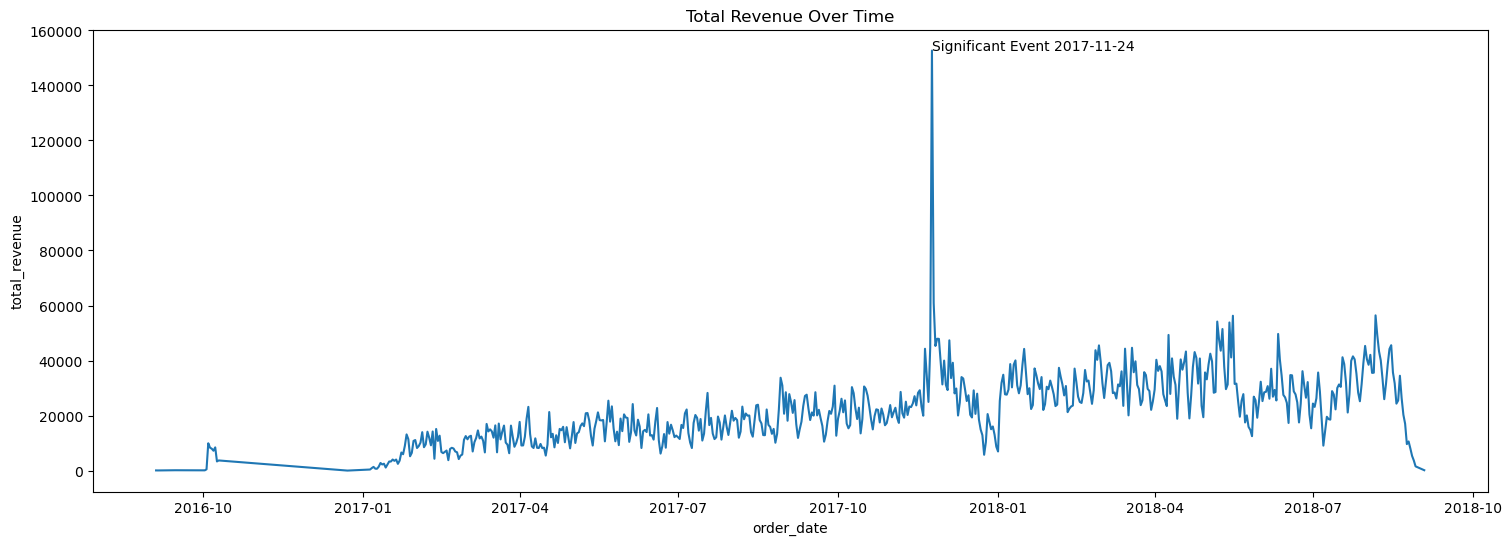

In [71]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=df, x="order_date", y="total_revenue", ax=ax)
plt.title("Total Revenue Over Time")
ax.annotate(f"Significant Event {significant_event_date}", xy=(df[df["total_revenue"] == df["total_revenue"].max()]["order_date"], df["total_revenue"].max())) 
plt.show()

This shows that the average revenue gained is volatile from day to day and month to month, We'll conduct some statistical tests to check wether the differences are statistically significant

In [88]:
alpha = 0.05

In [80]:
df["order_week"] = df["order_date"].dt.isocalendar().week
df["order_month"] = df["order_date"].dt.month
df["order_day"] = df["order_date"].dt.weekday

df.head()

,order_date,total_revenue,total_orders,avg_order_value,order_week,order_month,order_day
0,2016-09-04,72.89,1,36.445,35,9,6
1,2016-09-05,59.50,1,59.500,36,9,0
2,2016-09-15,134.97,1,44.990,37,9,3
3,2016-10-02,100.00,1,100.000,39,10,6
4,2016-10-03,463.48,8,57.935,40,10,0


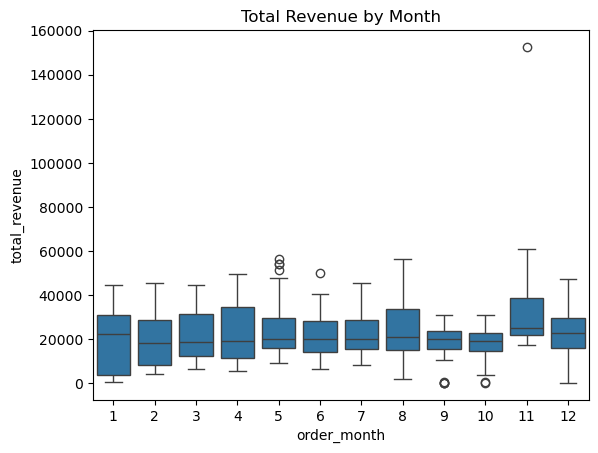

In [74]:
sns.boxplot(data=df, x="order_month", y="total_revenue")
plt.title("Total Revenue by Month")
plt.show()

In [77]:
pingouin.welch_anova(dv='total_revenue', between='order_month', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,order_month,11,216.617915,2.788039,0.002062,0.070816


In [102]:
pairwise_test = pingouin.pairwise_tests(dv='total_revenue', between='order_month', data=df, padjust='bonf', alternative="two-sided")

pairwise_test[pairwise_test['p-corr'] < alpha]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges


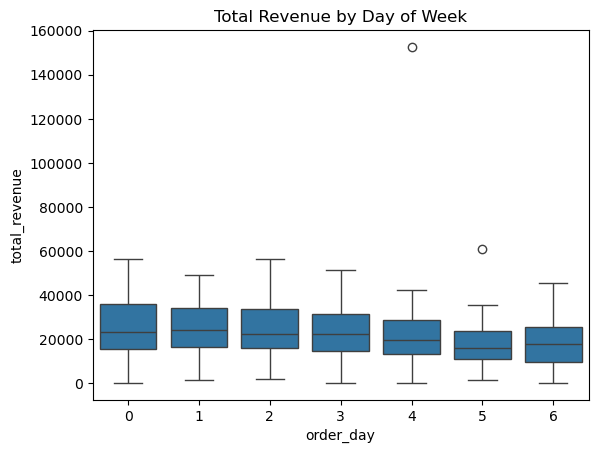

In [82]:
sns.boxplot(data=df, x="order_day", y="total_revenue")
plt.title("Total Revenue by Day of Week")
plt.show()

In [83]:
pingouin.welch_anova(dv='total_revenue', between='order_day', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,order_day,6,269.716343,8.443537,2.084728e-08,0.056072


In [106]:
pairwise_test = pingouin.pairwise_tests(dv='total_revenue', between='order_day', data=df, padjust='bonf', alternative="greater")

pairwise_test[pairwise_test['p-corr'] < alpha]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
4,order_day,0,5,False,True,4.304521,152.547179,greater,1.490041e-05,0.000313,bonf,1318.884,0.639870
5,order_day,0,6,False,True,3.888474,159.331850,greater,7.389094e-05,0.001552,bonf,300.564,0.577703
9,order_day,1,5,False,True,4.940758,172.000000,greater,9.170097e-07,0.000019,bonf,1.595e+04,0.745844
10,order_day,1,6,False,True,4.447096,167.866593,greater,7.890678e-06,0.000166,bonf,2250.427,0.668862
13,order_day,2,5,False,True,4.393941,172.000000,greater,9.710105e-06,0.000204,bonf,1832.098,0.663298
14,order_day,2,6,False,True,3.929715,165.300499,greater,6.238928e-05,0.001310,bonf,345.282,0.591305
16,order_day,3,5,False,True,3.693926,165.213284,greater,1.499133e-04,0.003148,bonf,157.001,0.555324
17,order_day,3,6,False,True,3.226068,170.673840,greater,7.522382e-04,0.015797,bonf,37.413,0.483305


Although there aren't any statistically significant difference between months, the tests shows that on average the revenue on weekdays (Monday - Thursday) are higher than weekends (Friday - Sunday)